In [11]:
#Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
#Importa os dados do arquivo CSV e monta o DataFrame com a Base de Dados
#Estatísticas de segurança: série histórica mensal por área de delegacia desde 01/2003
dfBD = pd.read_csv("https://www.ispdados.rj.gov.br/Arquivos/BaseDPEvolucaoMensalCisp.csv", sep= ";", encoding="latin1")
dfBD.head(2)

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3


In [13]:
#Cria um database somente com os dados da região = "Capital"
dfBDCapital = dfBD.loc[dfBD["regiao"] == 'Capital']
dfBDCapital.head(2)

,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmp,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,NaN,21,2,0,0,0,0,578,3
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,NaN,15,6,0,1,0,0,441,3


In [14]:
#Cria uma coluna com a soma dos furtos e roubos de veículos
dfBDCapital["soma_furtos_roubos_veiculos"] = dfBDCapital["furto_veiculos"] + dfBDCapital["roubo_veiculo"]
dfBDCapital.head(2)

C:\Users\Paulo Monteiro Jr\AppData\Local\Temp\ipykernel_7764\4272700853.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBDCapital["soma_furtos_roubos_veiculos"] = dfBDCapital["furto_veiculos"] + dfBDCapital["roubo_veiculo"]


,cisp,mes,ano,mes_ano,aisp,risp,munic,mcirc,regiao,hom_doloso,...,cmba,ameaca,pessoas_desaparecidas,encontro_cadaver,encontro_ossada,pol_militares_mortos_serv,pol_civis_mortos_serv,registro_ocorrencias,fase,soma_furtos_roubos_veiculos
0,1,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,0,...,NaN,21,2,0,0,0,0,578,3,17
1,4,1,2003,2003m01,5,1,Rio de Janeiro,3304557,Capital,3,...,NaN,15,6,0,1,0,0,441,3,18


In [15]:
#Soma os valores da coluna (soma_furtos_roubos_veiculos) por delegacia (cisp)
dfBDFurtoRouboVeiculos = dfBDCapital.groupby("cisp")["soma_furtos_roubos_veiculos"].sum().reset_index()
dfBDFurtoRouboVeiculos.head(2)

,cisp,soma_furtos_roubos_veiculos
0,1,2489
1,4,3374


In [16]:
#Cria o array com os dados do furto e roubo de veiculos da capital
arrayFurtoRouboVeiculos = np.array(dfBDFurtoRouboVeiculos["soma_furtos_roubos_veiculos"])
arrayFurtoRouboVeiculos

array([ 2489,  3374,  4309,  6742,  3921, 12654,  9632,   180,  2372,
        1472,  3473,  3069, 18078, 11193, 11179, 10131, 13197, 25161,
       22802, 15196, 14474, 12626, 10354, 38772, 14366, 21443, 17691,
       17522, 13675, 25743, 36770, 33178, 10019, 12888, 25864, 32313,
       22286, 10113,  9960,  4390, 17055,    78])

In [17]:
#Cálculo da média, mediana e quartis dos furtos e roubos
mediaFurtoRoubosVeiculos = np.mean(arrayFurtoRouboVeiculos)
medianaFurtoRoubosVeiculos = np.median(arrayFurtoRouboVeiculos)
q1FurtoRoubosVeiculos = np.percentile(arrayFurtoRouboVeiculos, 25)
q2FurtoRoubosVeiculos = np.percentile(arrayFurtoRouboVeiculos, 50)
q3FurtoRoubosVeiculos = np.percentile(arrayFurtoRouboVeiculos, 75)
distanciaFurtoRoubosVeiculos = (mediaFurtoRoubosVeiculos - medianaFurtoRoubosVeiculos) / medianaFurtoRoubosVeiculos
iqrFurtoRoubosVeiculos = q3FurtoRoubosVeiculos - q1FurtoRoubosVeiculos
limiteSuperiorFurtoRoubosVeiculos = q3FurtoRoubosVeiculos + (1.5 * iqrFurtoRoubosVeiculos)
limiteInferiorFurtoRoubosVeiculos = q1FurtoRoubosVeiculos - (1.5 * iqrFurtoRoubosVeiculos)

print(f'Média     = {mediaFurtoRoubosVeiculos:.2f}')
print(f'Mediana   = {medianaFurtoRoubosVeiculos:.2f}')
print(f'Q1        = {q1FurtoRoubosVeiculos:.2f}')
print(f'Q2        = {q2FurtoRoubosVeiculos:.2f}')
print(f'Q3        = {q3FurtoRoubosVeiculos:.2f}')
print(f'Distância = {distanciaFurtoRoubosVeiculos * 100:.2f} %')       #Em percentual
print(f'Lim. Sup. = {limiteSuperiorFurtoRoubosVeiculos:.2f}')
print(f'Lim. Inf. = {limiteInferiorFurtoRoubosVeiculos:.2f}')

Média     = 13862.00
Mediana   = 12640.00
Q1        = 4978.00
Q2        = 12640.00
Q3        = 17981.25
Distância = 9.67 %
Lim. Sup. = 37486.12
Lim. Inf. = -14526.88


In [18]:
#Delegacias que representam os OUTLIERS com MAIOR número de furtos e roubos de veículos
delegacias_MaiorOutlier = dfBDFurtoRouboVeiculos.loc[dfBDFurtoRouboVeiculos["soma_furtos_roubos_veiculos"] >= limiteSuperiorFurtoRoubosVeiculos]
delegacias_MaiorOutlier.sort_values(by="soma_furtos_roubos_veiculos")

,cisp,soma_furtos_roubos_veiculos
23,27,38772


In [19]:
###############################################################################################################
#RESPOSTA:
#A delegacia acima está acima do limite superior e é considerado OUTLIER em relação a furto e roubo de veículos
###############################################################################################################

C:\Users\Paulo Monteiro Jr\AppData\Local\Temp\ipykernel_7764\3765283660.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfBDFurtoRouboVeiculosGrafico['cisp'] = dfBDFurtoRouboVeiculosGrafico['cisp'].astype(str)


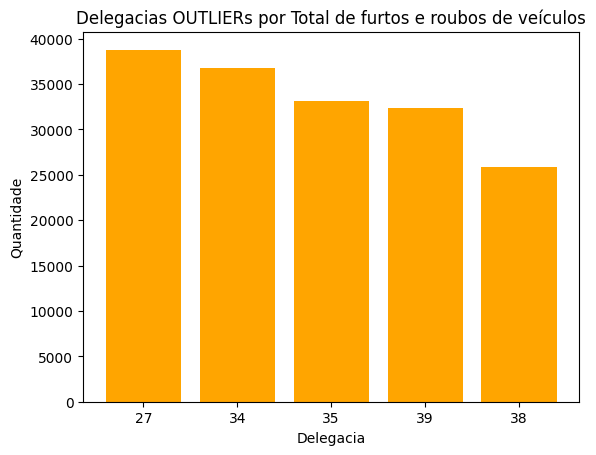

In [24]:
#Como só tem 1 OUTLIER, vou exibir as 5 delegacias com mais roubo
dfBDFurtoRouboVeiculos = dfBDFurtoRouboVeiculos.sort_values('soma_furtos_roubos_veiculos', ascending=False)
dfBDFurtoRouboVeiculosGrafico = dfBDFurtoRouboVeiculos.head(5)

#Transformo a coluna cisp de INT para STRING
dfBDFurtoRouboVeiculosGrafico['cisp'] = dfBDFurtoRouboVeiculosGrafico['cisp'].astype(str)

#Gero o gráfico
plt.bar(dfBDFurtoRouboVeiculosGrafico['cisp'], dfBDFurtoRouboVeiculosGrafico['soma_furtos_roubos_veiculos'], color='orange')
plt.title('Delegacias OUTLIERs por Total de furtos e roubos de veículos')
plt.xlabel('Delegacia')
plt.ylabel('Quantidade')
plt.grid(False)
plt.show()